## Import packages we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup

In [158]:
page = open('Store_location.html',encoding='utf8').read()
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0034)https://www.athome.com/store-find/ -->
<html class="veiled" lang="en" style="position: relative;">
 <head class="at-element-marker">
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <style>
   .gm-style .gm-style-mtc label,.gm-style .gm-style-mtc div{font-weight:400}.gm-style .gm-style-mtc ul,.gm-style .gm-style-mtc li{box-sizing:border-box}
  </style>
  <style>
   .gm-control-active>img{box-sizing:content-box;display:none;left:50%;pointer-events:none;position:absolute;top:50%;transform:translate(-50%,-50%)}.gm-control-active>img:nth-child(1){display:block}.gm-control-active:hover>img:nth-child(1),.gm-control-active:active>img:nth-child(1){display:none}.gm-control-active:hover>img:nth-child(2),.gm-control-active:active>img:nth-child(3){display:block}
  </style>
  <link href="./Store_location_files/css" rel="stylesheet" type="text/css"/>
  <style>
   .gm-ui-hover-effect{opacity:.6}.gm-ui-hover-effect:hover{opacity:1}
  </

In [159]:
address = soup.find_all(attrs = {"class": "col-5 col-lg-3 store-address"})
print(address)

[<div class="col-5 col-lg-3 store-address">
<span class="store-address-1">
					300 Providence Hwy
				</span>
<span class="store-city">
					Dedham
					MA
					02026
				</span>
<div class="store-phone">
						781-471-2261
					</div>
<span class="store-change store-change-from-list" data-accepttext="OK" data-bodytexterror="Error: We were unable to update your store location. Please try again." data-bodytextsuccess="Your store location has changed to Massachusetts-Dedham" data-heading="Change Store" data-href="/store-detail/?StoreID=Massachusetts-Dedham" data-id="Massachusetts-Dedham" data-isca="" data-target="" data-target-store-capu="true" data-toggle="modal" data-update-cart-url="/on/demandware.store/Sites-athome-sfra-Site/default/Cart-UpdateCart?storeId=Massachusetts-Dedham" data-url="/set-store/?storeid=Massachusetts-Dedham">
					Make This Your Store
				</span>
</div>, <div class="col-5 col-lg-3 store-address">
<span class="store-address-1">
					1110 Fall River Ave
				</span

In [160]:
len(address)

227

### Extract the address information

In [161]:
address1 = soup.find_all(attrs = {"class": "store-address-1"})
store_address = []
for address in address1:
    store_address.append(address.get_text().strip())
print(store_address)
print(len(store_address))

['300 Providence Hwy', '1110 Fall River Ave', '650 Bald Hill Rd', '1181 Tolland Turnpike', '161 Washington Ave Ext', '5101 Fashion Dr', '100 N Galleria Dr', '6135 Junction Blvd', '77 Willowbrook Blvd, Ste 81', '2341 NJ-66', '4645 Commercial Dr', '1930 N Jersey 88', '2520 MacArthur Road', '2620 Moreland Rd', '9090 Destiny USA Dr', '989 Church Rd', '5700 Route 42 N', '1890 Fruitville Pike', '5070 Jonestown Rd', '1100 Jefferson Rd', '855 Town Center Dr', '3049 West Ridge Road', '6716 Governor Ritchie Hwy', '1647 Crofton Center', '1811 Monocacy Blvd', '209 Kentlands Blvd', '19460 Compass Creek Pkwy', '13910 Metrotech Dr', '2851 Dale Blvd', '8300 Sudley Rd', '3655 Plank Rd', '2080 Interchange Rd #500', '1072 W Mercury Blvd', '401 International Center Dr', '120 Mall Plaza Blvd', '1517 Sams Cir', '3000 Mcintyre Square Dr.', '11500 Midlothian Turnpike', '2000 Casteel Dr', '5555 Youngstown-Warren Rd', '7980 Plaza Blvd', '4932 Portage St NW', '5223 Cobblestone Rd', '4700 Green Rd - Corner of Cap

### Check the number of cities.

In [162]:
city = soup.find_all(attrs = {"class": "store-city"})
print(city)
print(len(city))

[<span class="store-city">
					Dedham
					MA
					02026
				</span>, <span class="store-city">
					Seekonk
					MA
					02771
				</span>, <span class="store-city">
					Warwick
					RI
					02886
				</span>, <span class="store-city">
					Manchester
					CT
					06042
				</span>, <span class="store-city">
					Albany
					NY
					12205
				</span>, <span class="store-city">
					Nanuet
					NY
					10954
				</span>, <span class="store-city">
					Middletown
					NY
					10941
				</span>, <span class="store-city">
					Rego Park
					NY
					11374
				</span>, <span class="store-city">
					Wayne
					NJ
					07470
				</span>, <span class="store-city">
					Ocean Township
					NJ
					07712
				</span>, <span class="store-city">
					New Hartford
					NY
					13413
				</span>, <span class="store-city">
					Brick
					NJ
					08724
				</span>, <span class="store-city">
					Whitehall
					PA
					18052
				</span>, <span class="store-city">
					Willow Grove
					PA
					1909

### Store the city, state, zip into three list.

In [163]:
store_city = []
store_state = []
store_zip = []
#store_location = []
for location in city:
    store_city.append(location.get_text().replace('\t', '').split(sep = '\n')[1])
    store_state.append(location.get_text().replace('\t', '').split(sep = '\n')[2])
    store_zip.append(location.get_text().replace('\t', '').split(sep = '\n')[3])
    #store_location.append(location.get_text().replace('\t', '').split(sep = '\n')[1:4])
    #print(location.get_text().replace('\t', '').split(sep = '\n')[1:4])


In [164]:
# find a way to get the details of each store.
soup.find_all(attrs = {"class": "store-name"})

[<div class="store-name">
 <span class="store-location-id">
 <a href="https://www.athome.com/store-detail/?StoreID=Massachusetts-Dedham" id="mobileStoreLocation-Massachusetts-Dedham" title="Store Details">
 							Massachusetts-Dedham
 						</a>
 </span>
 <span class="store-location-link">
 <a class="store-details-link" href="https://www.athome.com/store-detail/?StoreID=Massachusetts-Dedham" id="mobileDetails-Massachusetts-Dedham" title="Store Details Massachusetts-Dedham">
 							Store Details
 						</a>
 </span>
 <div class="sl-badges-container">
 <div class="sl-badge">
 <img alt="Buy Online Pick Up In Store" src="./Store_location_files/badge-bopis.png" style="display: block; width: 100%;"/>
 </div>
 <div class="sl-badge">
 <img alt="Buy Online Pick Up Curbside" src="./Store_location_files/badge-curbside.png" style="display: block; width: 100%;"/>
 </div>
 <div class="sl-badge">
 <img alt="Local Store Delivery" src="./Store_location_files/badge-delivery.png" style="display: block;

In [165]:
# check the number of each store's details
len(soup.find_all(attrs = {"class": "sl-badges-container"}))

226

In [166]:
import re

### store the details  of each store into three lists.

In [167]:
details = soup.find_all(attrs = {"class": "sl-badges-container"})
i = 0
BOPS = []
BOPC = []
LSD = []
for detail in details:
    detail = str(detail)
    #print(detail)
    if re.search(r'Buy Online Pick Up In Store',detail):
        BOPS.append(1)
    else:
        BOPS.append(0)
    if re.search(r'Buy Online Pick Up Curbside',detail):
        BOPC.append(1)
    else:
        BOPC.append(0)
    if re.search(r'Local Store Delivery',detail):
        LSD.append(1)
    else:
        LSD.append(0)
    
    #for child in detail.children:
    #    child = str(child)
        #print(type(child))
    #    print(re.search(r'alt=".*',child))

print(BOPS,len(BOPS))
print(BOPC,len(BOPC))
print(LSD,len(LSD))

    #target = detail.get_text().replace("\t","")
    #print(detail['alt'])
    #print(re.findall("B.*",target))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 226
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [168]:
# make up the missing one.
BOPS.append(BOPS[225])
BOPC.append(BOPC[225])
LSD.append(LSD[225])
BOPS[225] = 0
BOPC[225] = 0
LSD[225] = 0

In [169]:
# check the detail of each stores.
print(BOPS,len(BOPS))
print(BOPC,len(BOPC))
print(LSD,len(LSD))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] 227
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [170]:
# store every AHG store name
store = soup.find_all(attrs = {"title": "Store Details"})
store_name = []
for name in store:
    store_name.append(name.get_text().replace('\t','').split(sep = '\n')[1])
print(store_name, len(store_name))

['Massachusetts-Dedham', 'Massachusetts-Seekonk', 'Rhode Island-Warwick North', 'Connecticut-Manchester', 'New York-Albany', 'New York-Nanuet', 'New York-Middletown', 'New York-Rego Park', 'New Jersey-Wayne', 'New Jersey-Ocean Township', 'New York-New Hartford', 'New Jersey-Brick', 'Pennsylvania-Whitehall Township', 'Pennsylvania-Willow Grove', 'New York-Syracuse', 'New Jersey-Cherry Hill', 'New Jersey-Turnersville', 'Pennsylvania-Lancaster', 'Pennsylvania-Harrisburg', 'New York-Rochester', 'Pennsylvania-York', 'New York-Greece', 'Maryland-Glen Burnie', 'Maryland-Crofton', 'Maryland-Frederick', 'Maryland-Gaithersburg', 'Virginia-Leesburg', 'Virginia-Chantilly', 'Virginia-Dale City', 'Virginia-Manassas', 'Virginia-Fredericksburg', 'Pennsylvania-Erie', 'Virginia-Hampton', 'Virginia-Richmond', 'Pennsylvania-Monroeville', 'Virginia-Chesapeake', 'Pennsylvania-Pittsburgh', 'Virginia-Chesterfield', 'Pennsylvania-Coraopolis', 'Ohio-Niles', 'Ohio-Mentor', 'Ohio-North Canton', 'Ohio-Elyria', 'No

In [171]:
at_home_df = pd.DataFrame()
at_home_df['stores'] = store_name
at_home_df['address'] = store_address
at_home_df['city'] = store_city
at_home_df['state'] = store_state
at_home_df['zip'] = store_zip
at_home_df['bops'] = BOPS
at_home_df['bopc'] = BOPC
at_home_df['lsd'] = LSD

In [172]:
# Check the customized dataset.
print(len(at_home_df))
at_home_df.head()

227


,stores,address,city,state,zip,bops,bopc,lsd
0,Massachusetts-Dedham,300 Providence Hwy,Dedham,MA,02026,1,1,1
1,Massachusetts-Seekonk,1110 Fall River Ave,Seekonk,MA,02771,1,1,1
2,Rhode Island-Warwick North,650 Bald Hill Rd,Warwick,RI,02886,1,1,1
3,Connecticut-Manchester,1181 Tolland Turnpike,Manchester,CT,06042,1,1,1
4,New York-Albany,161 Washington Ave Ext,Albany,NY,12205,1,1,0


In [173]:
at_home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stores   227 non-null    object
 1   address  227 non-null    object
 2   city     227 non-null    object
 3   state    227 non-null    object
 4   zip      227 non-null    object
 5   bops     227 non-null    int64 
 6   bopc     227 non-null    int64 
 7   lsd      227 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 14.3+ KB


### Import the 2019 census data

In [174]:
census_data_2019 = pd.read_csv(r'C:\Users\Michael\Downloads\ACSST5Y2019.S0802_2021-05-07T094209\ACSST5Y2019.S0802_data_with_overlays_2021-05-07T025422.csv',
                         header = 1,usecols = ['Geographic Area Name',
                                               'Estimate!!Total!!Workers 16 years and over',
                                               'Estimate!!Total!!Workers 16 years and over!!AGE!!Median age (years)',
                                               'Estimate!!Total!!EARNINGS IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) FOR WORKERS!!Workers 16 years and over with earnings!!Median earnings (dollars)',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Management, business, science, and arts occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Service occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Sales and office occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Natural resources, construction, and maintenance occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Production, transportation, and material moving occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Private wage and salary workers',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Government workers',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Self-employed workers in own not incorporated business',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers',
                                               'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)',
                                               'Estimate!!Total!!Workers 16 years and over in households!!HOUSING TENURE!!Owner-occupied housing units',
                                               'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available',
                                               'Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over'])

In [175]:
rename_dict = {'Geographic Area Name': 'zip',
               'Estimate!!Total!!Workers 16 years and over': '#_of_workers_over_16',
               'Estimate!!Total!!Workers 16 years and over!!AGE!!Median age (years)': 'median_age',
               'Estimate!!Total!!EARNINGS IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) FOR WORKERS!!Workers 16 years and over with earnings!!Median earnings (dollars)': 'median_earnings',
               'Estimate!!Total!!EARNINGS IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) FOR WORKERS!!Workers 16 years and over with earnings!!Median earnings (dollars)': 'median_earnings',
               'Estimate!!Total!!EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR WORKERS!!Workers 16 years and over with earnings!!Median earnings (dollars)': 'median_earnings',
               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Management, business, science, and arts occupations': 'occupation_MBSA',
               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Service occupations': 'occupation_Ser',
               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Sales and office occupations': 'occupation_sales_and_office',
               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Natural resources, construction, and maintenance occupations': 'occupation_NrCM',
               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Production, transportation, and material moving occupations': 'occupation_PTMm',
               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Private wage and salary workers': 'class_private_wage_and_salary',
               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Government workers': 'class_government_workers',
               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Self-employed workers in own not incorporated business': 'class_self_employed',
               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers': 'class_unpaid_family_workers',
               'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)': 'mean_travel_time_to_work',
               'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)': 'mean_travel_time_to_work',
               'Estimate!!Total!!Workers 16 years and over in households!!HOUSING TENURE!!Owner-occupied housing units': 'owner_occupied_houseing_units(percent)',
               'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available': 'no_vehicle(percent)',
               'Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over': 'public_transportation'}

In [176]:
census_data_2019 = census_data_2019.rename(mapper=rename_dict,axis = 1)
census_data_2019['zip'] = census_data_2019['zip'].str.split(n = 1,expand=True)[1]
print(census_data_2019.shape)
census_data_2019.head()


(33120, 17)


,zip,#_of_workers_over_16,median_age,median_earnings,occupation_MBSA,occupation_Ser,occupation_sales_and_office,occupation_NrCM,occupation_PTMm,class_private_wage_and_salary,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation
0,35004,5942,39.2,41972,34.1,13.3,26.6,11.1,14.8,86.5,10.5,2.7,0.3,N,82.8,0,0
1,35005,2641,45.7,36142,28.4,18,26.2,6.7,20.7,74.6,21.2,4.2,0,N,75.5,3.2,1
2,35006,1109,48.5,38589,14.2,15.2,23.9,26,20.6,82.2,8.1,9.6,0,N,92.2,2.2,0
3,35007,12358,42.2,41693,39.9,15.7,25.8,9.1,9.5,80.6,13.8,4.9,0.7,N,82.1,0.6,0
4,35010,7991,44.2,32813,29.7,18.5,20.4,9.4,21.9,78.8,16.2,4.8,0.1,N,75.3,1.2,8


In [177]:
rename_2018 = {'Geographic Area Name': 'zip',
               'Estimate!!Total!!Workers 16 years and over': 'workers_over_16_2018',
               'Estimate!!Total!!Workers 16 years and over!!AGE!!Median age (years)': 'median_age_2018',
               'Estimate!!Total!!EARNINGS IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) FOR WORKERS!!Workers 16 years and over with earnings!!Median earnings (dollars)': 'median_earnings_2018',
              'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)': 'mean_travel_time_to_work_2018'}

In [178]:
census_data_2018 = pd.read_csv(r'C:\Users\Michael\Downloads\ACSST5Y2018.S0802_2021-05-13T000747\ACSST5Y2018.S0802_data_with_overlays_2021-05-13T000119.csv',
                         header = 1,usecols = ['Geographic Area Name',
                                               'Estimate!!Total!!Workers 16 years and over',
                                               'Estimate!!Total!!Workers 16 years and over!!AGE!!Median age (years)',
                                               'Estimate!!Total!!EARNINGS IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) FOR WORKERS!!Workers 16 years and over with earnings!!Median earnings (dollars)',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Management, business, science, and arts occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Service occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Sales and office occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Natural resources, construction, and maintenance occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Production, transportation, and material moving occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Private wage and salary workers',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Government workers',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Self-employed workers in own not incorporated business',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers',
                                               'Estimate!!Total!!Workers 16 years and over in households!!HOUSING TENURE!!Owner-occupied housing units',
                                               'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available',
                                               'Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over',
                                               'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)'])
census_data_2018 = census_data_2018.rename(mapper=rename_dict,axis = 1)
census_data_2018['zip'] = census_data_2018['zip'].str.split(n = 1,expand = True)[1]
census_data_2018.head()

,zip,#_of_workers_over_16,median_age,median_earnings,occupation_MBSA,occupation_Ser,occupation_sales_and_office,occupation_NrCM,occupation_PTMm,class_private_wage_and_salary,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation
0,35004,5962.0,39.5,37798,32.9,15.0,28.1,10.3,13.7,87.5,9.7,2.8,0.0,N,79.2,0.0,0.0
1,35005,2667.0,44.6,33836,28.2,17.0,25.4,6.9,22.5,75.1,20.1,4.9,0.0,N,72.8,3.4,1.0
2,35006,943.0,46.4,41595,14.5,9.7,28.4,24.1,23.3,84.5,9.0,6.5,0.0,N,80.6,2.5,0.0
3,35007,12326.0,42.7,40298,37.2,16.2,24.5,10.7,11.3,82.8,11.3,5.7,0.2,N,80.7,0.4,0.0
4,35010,7705.0,44.4,31645,29.3,17.7,19.1,11.1,22.8,82.1,14.1,3.6,0.2,N,72.6,3.9,0.0


In [179]:
census_data_2017 = pd.read_csv(r'C:\Users\Michael\Downloads\ACSST5Y2017.S0802_2021-05-14T200535\ACSST5Y2017.S0802_data_with_overlays_2021-05-14T195905.csv',
                         header = 1,usecols = ['Geographic Area Name',
                                               'Estimate!!Total!!Workers 16 years and over',
                                               'Estimate!!Total!!Workers 16 years and over!!AGE!!Median age (years)',
                                               'Estimate!!Total!!EARNINGS IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) FOR WORKERS!!Workers 16 years and over with earnings!!Median earnings (dollars)',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Management, business, science, and arts occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Service occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Sales and office occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Natural resources, construction, and maintenance occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!OCCUPATION!!Production, transportation, and material moving occupations',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Private wage and salary workers',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Government workers',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Self-employed workers in own not incorporated business',
                                               'Estimate!!Total!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers',
                                               'Estimate!!Total!!Workers 16 years and over in households!!HOUSING TENURE!!Owner-occupied housing units',
                                               'Estimate!!Total!!Workers 16 years and over in households!!VEHICLES AVAILABLE!!No vehicle available',
                                               'Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over',
                                               'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)'])
census_data_2017 = census_data_2017.rename(mapper=rename_dict,axis = 1)
census_data_2017['zip'] = census_data_2017['zip'].str.split(n = 1,expand = True)[1]
census_data_2017.head()

,zip,#_of_workers_over_16,median_age,median_earnings,occupation_MBSA,occupation_Ser,occupation_sales_and_office,occupation_NrCM,occupation_PTMm,class_private_wage_and_salary,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation
0,35004,5877,42.0,38108,33.4,13.3,32.1,9.0,12.2,85.9,11.8,2.3,0.0,N,80.7,0.6,0
1,35005,2777,44.1,33862,31.1,14.7,27.7,7.4,19.1,74.7,20.6,4.6,0.0,N,73.6,2.8,1
2,35006,873,42.6,41875,17.3,8.6,27.4,27.3,19.5,84.1,10.4,5.5,0.0,N,81.6,2.3,8
3,35007,11902,43.1,40311,36.7,16.1,25.7,11.2,10.3,82.0,12.4,5.4,0.2,28.9,82.2,0.4,0
4,35010,7596,42.7,29569,28.3,19.5,17.3,10.2,24.8,83.8,12.6,3.6,0.0,N,69.3,3.4,0


In [180]:
housing_data_2019 = pd.read_csv(r'C:\Users\Michael\Downloads\ACSST5Y2019.S2504_2021-05-11T123227\ACSST5Y2019.S2504_data_with_overlays_2021-05-11T120758.csv',
                         header = 1,usecols = ['Geographic Area Name',
                                               'Estimate!!Occupied housing units!!Occupied housing units',
                                               'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2014 or later'])
housing_data_2019.rename(columns={'Geographic Area Name': 'zip',
                             'Estimate!!Occupied housing units!!Occupied housing units':'occupied_housing_units',
                             'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2014 or later': 'housing_built_2014+'},
                   inplace=True)
housing_data_2019.head()

,zip,occupied_housing_units,housing_built_2014+
0,ZCTA5 35004,4624,1.8
1,ZCTA5 35005,2697,0
2,ZCTA5 35006,1018,2.9
3,ZCTA5 35007,9292,1.1
4,ZCTA5 35010,7987,3.1


In [181]:
housing_data_2018 = pd.read_csv(r'C:\Users\Michael\Downloads\ACSST5Y2018.S2504_2021-05-13T001551\ACSST5Y2018.S2504_data_with_overlays_2021-05-13T001313.csv',
                         header = 1,usecols = ['Geographic Area Name',
                                               'Estimate!!Occupied housing units!!Occupied housing units',
                                               'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2014 or later'])
housing_data_2018.rename(columns={'Geographic Area Name': 'zip',
                             'Estimate!!Occupied housing units!!Occupied housing units':'occupied_housing_units',
                             'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2014 or later': 'housing_built_2014+'},
                   inplace=True)
housing_data_2018.head()

,zip,occupied_housing_units,housing_built_2014+
0,ZCTA5 35004,4533,1.4
1,ZCTA5 35005,2663,0.0
2,ZCTA5 35006,1084,0.9
3,ZCTA5 35007,8979,0.3
4,ZCTA5 35010,8312,2.8


In [183]:
housing_data_2017 = pd.read_csv(r'C:\Users\Michael\Downloads\ACSST5Y2017.S2504_2021-05-14T234946\ACSST5Y2017.S2504_data_with_overlays_2021-05-14T234247.csv',
                         header = 1,usecols = ['Geographic Area Name',
                                               'Estimate!!Occupied housing units!!Occupied housing units',
                                               'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2014 or later'])
housing_data_2017.rename(columns={'Geographic Area Name': 'zip',
                             'Estimate!!Occupied housing units!!Occupied housing units':'occupied_housing_units',
                             'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2014 or later': 'housing_built_2014+'},
                   inplace=True)
housing_data_2017.head()

,zip,occupied_housing_units,housing_built_2014+
0,ZCTA5 35004,4460,0.5
1,ZCTA5 35005,2792,0.0
2,ZCTA5 35006,1087,1.1
3,ZCTA5 35007,8628,0.2
4,ZCTA5 35010,8142,3.1


In [184]:
housing_data_2019['zip'] = housing_data_2019['zip'].str.split(n = 1,expand=True)[1]
housing_data_2018['zip'] = housing_data_2018['zip'].str.split(n = 1,expand=True)[1]
housing_data_2017['zip'] = housing_data_2017['zip'].str.split(n = 1,expand=True)[1]

In [185]:
stores_num_2018 = pd.read_csv(r'C:\Users\Michael\Downloads\CBP2018.CB1800CBP_2021-05-12T155938\CBP2018.CB1800CBP_data_with_overlays_2021-05-12T155934.csv',
                             header = 1, usecols=['Geographic Area Name',
                                                  'Meaning of Employment size of establishments',
                                                 'Number of establishments'])
stores_num_2018.rename(columns = {'Geographic Area Name': 'zip',
                            'Number of establishments': 'num_of_establishments'},
                  inplace = True)
stores_num_2018 = stores_num_2018[stores_num_2018['Meaning of Employment size of establishments'] == 'All establishments']
stores_num_2018.drop(columns = 'Meaning of Employment size of establishments',inplace = True)
stores_num_2018['zip'] = stores_num_2018['zip'].str.split(n = 2,expand = True)[1]
stores_num_2018.head()

,zip,num_of_establishments
0,01002,3
1,01020,4
2,01028,3
3,01035,3
4,01040,11


In [186]:
stores_num_2017 = pd.read_csv(r'C:\Users\Michael\Downloads\ZBP2017.CB1700ZBP_2021-05-16T192530\ZBP2017.CB1700ZBP_data_with_overlays_2021-05-16T192527.csv',
                             header = 1, usecols=['Geographic Area Name',
                                                  'Meaning of Employment size of establishments',
                                                 'Number of establishments'])
stores_num_2017.rename(columns = {'Geographic Area Name': 'zip',
                            'Number of establishments': 'num_of_establishments'},
                  inplace = True)
stores_num_2017 = stores_num_2017[stores_num_2017['Meaning of Employment size of establishments'] == 'All establishments']
stores_num_2017.drop(columns = 'Meaning of Employment size of establishments',inplace = True)
stores_num_2017['zip'] = stores_num_2017['zip'].str.split(n = 2,expand = True)[1]
stores_num_2017.head()

,zip,num_of_establishments
0,01002,3
1,01020,4
2,01028,3
3,01035,3
4,01040,11


In [ ]:
merged_df = at_home_df.merge(census_data_2019,on='zip',how = 'left')
#merged_df = merged_df.merge(census_data_2018,on = 'zip', how = 'left')
merged_df = merged_df.merge(housing_data_2019,on='zip',how = 'left')
#merged_df = merged_df.merge(housing_data_2018,on = 'zip', how = 'left')

merged_df = merged_df.merge(stores_num_2018,on = 'zip', how = 'left')
merged_df = merged_df.replace('N',np.nan)
merged_df = merged_df.replace('**',np.nan)
merged_df = merged_df.replace('-',np.nan)
merged_df.head()

In [ ]:
print(len(merged_df))
merged_df.head()

In [ ]:
print(merged_df.shape)

merged_df.isna().sum()

In [ ]:
#merged_df.to_csv('at_home_data_v3.csv',index = False)

In [2]:
at_home = pd.read_csv('at_home_data_v3.csv',dtype = {'zip': 'str'})
at_home_class = pd.read_excel('Simulated_Store_Sales_2021Feb23-4.xlsx',dtype = {'ZIPCODE': 'str'})
at_home.head()

,stores,rating,address,city,state,zip,bops,bopc,lsd,#_of_workers_over_16,...,public_transportation,occupied_housing_units,housing_built_2014+,occupied_housing_units_2018,housing_built_2014+_2018,workers_over_16_2018,median_age_2018,median_earnings_2018,mean_travel_time_to_work_2018,num_of_establishments
0,Massachusetts-Dedham,4.4,300 Providence Hwy,Dedham,MA,02026,1,1,1,13438.0,...,1483.0,10026.0,1.0,9974.0,0.8,13384.0,45.5,57766.0,30.4,9.0
1,Massachusetts-Seekonk,4.0,1110 Fall River Ave,Seekonk,MA,02771,1,1,1,8302.0,...,160.0,6052.0,2.0,6004.0,1.9,8020.0,46.1,52275.0,NaN,11.0
2,Rhode Island-Warwick North,4.1,650 Bald Hill Rd,Warwick,RI,02886,1,1,1,14532.0,...,208.0,12498.0,0.6,12552.0,0.5,14378.0,44.2,44463.0,23.7,16.0
3,Connecticut-Manchester,4.3,1181 Tolland Turnpike,Manchester,CT,06042,1,1,1,12150.0,...,197.0,9632.0,0.3,9729.0,0.0,12622.0,37.4,51389.0,24.8,4.0
4,New York-Albany,4.1,161 Washington Ave Ext,Albany,NY,12205,1,1,0,14218.0,...,473.0,11061.0,0.1,11149.0,0.1,14188.0,40.8,41728.0,20.5,21.0


In [3]:
at_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   stores                                  227 non-null    object 
 1   rating                                  226 non-null    float64
 2   address                                 227 non-null    object 
 3   city                                    227 non-null    object 
 4   state                                   227 non-null    object 
 5   zip                                     227 non-null    object 
 6   bops                                    227 non-null    int64  
 7   bopc                                    227 non-null    int64  
 8   lsd                                     227 non-null    int64  
 9   #_of_workers_over_16                    226 non-null    float64
 10  median_age                              226 non-null    float6

In [4]:
at_home[at_home['rating'].isna()]

,stores,rating,address,city,state,zip,bops,bopc,lsd,#_of_workers_over_16,...,public_transportation,occupied_housing_units,housing_built_2014+,occupied_housing_units_2018,housing_built_2014+_2018,workers_over_16_2018,median_age_2018,median_earnings_2018,mean_travel_time_to_work_2018,num_of_establishments
225,California-Sacramento,NaN,8320 Delta Shores Circle S.,Sacramento,CA,95832,0,0,0,4428.0,...,182.0,3147.0,0.0,3156.0,0.0,4234.0,38.2,26514.0,28.6,NaN


In [5]:
len(at_home['zip'].unique())

227

## Cleaning ZIPCODE & Rename

In [6]:
at_home_class.dtypes

Year                 int64
DMA_DESC            object
STORE ADDRESS       object
CITY                object
STATE               object
ZIPCODE             object
SIMULATED_SALES    float64
dtype: object

In [7]:
at_home_class.head()

,Year,DMA_DESC,STORE ADDRESS,CITY,STATE,ZIPCODE,SIMULATED_SALES
0,2017,Memphis,5280 Summer Ave,Memphis,TN,38122-4418,1.158712e+07
1,2017,Atlanta,1605 Buford Highway,BUFORD,GA,30518,9.483031e+06
2,2017,Toledo,2244 S Reynolds Rd,TOLEDO,OH,43614,7.325231e+06
3,2017,Phoenix (Prescott),5000 S. Arizona Mills Circle,TEMPE,AZ,85282,6.567164e+06
4,2017,Memphis,7697 Winchester Road,Memphis,TN,38125,6.803906e+06


In [8]:
at_home_class['ZIPCODE'] = at_home_class['ZIPCODE'].astype('str').str.replace('-',' ').str.split(expand = True)[0]

In [9]:
at_home_class.rename(str.lower,axis = 'columns', inplace = True)
at_home_class.rename(columns={'zipcode': 'zip'}, inplace = True)
print(at_home_class.columns)

Index(['year', 'dma_desc', 'store address', 'city', 'state', 'zip',
       'simulated_sales'],
      dtype='object')


In [61]:
def clean_zip(df, target = 'zip'):
    """
    df: the target dataframe.
    target: the column comtains zip code.
    """
    for i in range(len(df)):
        if len(df.loc[i,target]) == 4:
            df.loc[i,target] = str(0) + df.loc[i,target]
    return df

In [10]:
at_home_class = clean_zip(df = at_home_class)

In [11]:
AHG_2017 = at_home_class[at_home_class['year'] == 2017]
AHG_2018 = at_home_class[at_home_class['year'] == 2018]
AHG_2019 = at_home_class[at_home_class['year'] == 2019]
AHG_2020 = at_home_class[at_home_class['year'] == 2020]
print('AHG_2017: {}\nAHG_2018: {}\nAHG_2019: {}\nAHG_2020: {}'.format(AHG_2017.shape,AHG_2018.shape,AHG_2019.shape, AHG_2020.shape))

AHG_2017: (151, 7)
AHG_2018: (183, 7)
AHG_2019: (216, 7)
AHG_2020: (219, 7)


In [12]:
at_home[at_home['state'] == 'AZ']

,stores,rating,address,city,state,zip,bops,bopc,lsd,#_of_workers_over_16,...,public_transportation,occupied_housing_units,housing_built_2014+,occupied_housing_units_2018,housing_built_2014+_2018,workers_over_16_2018,median_age_2018,median_earnings_2018,mean_travel_time_to_work_2018,num_of_establishments
208,Arizona-Tucson,4.3,5255 E Broadway Blvd,Tucson,AZ,85711,1,1,1,19216.0,...,937.0,16837.0,0.0,16673.0,0.0,18464.0,39.8,26725.0,NaN,7.0
209,Arizona-Prescott,4.3,1801 East State Route 69,Prescott,AZ,86301,1,1,0,7763.0,...,37.0,10121.0,5.6,9843.0,4.7,7750.0,44.8,27035.0,18.0,8.0
210,Arizona-Mesa,4.3,1944 S Greenfield Rd,Mesa,AZ,85206,1,1,1,15157.0,...,304.0,15645.0,1.1,15388.0,0.6,14531.0,39.3,33895.0,NaN,14.0
211,Arizona-Scottsdale,4.3,15255 N Northsight Blvd,Scottsdale,AZ,85260,1,1,1,20870.0,...,88.0,18143.0,0.4,17518.0,0.2,19454.0,45.9,58018.0,NaN,35.0
212,Arizona-Gilbert,4.3,1891 Williams Field Rd,Gilbert,AZ,85295,1,1,1,24515.0,...,156.0,14789.0,8.2,14095.0,5.4,22974.0,39.0,49015.0,27.7,8.0
213,Arizona-Phoenix,4.2,12025 N 32nd St,Phoenix,AZ,85028,1,1,1,9895.0,...,138.0,8080.0,0.4,7962.0,0.0,9751.0,48.6,52927.0,NaN,5.0
214,Arizona-Tempe South,4.2,1050 W Elliot Rd,Tempe,AZ,85284,1,1,1,11008.0,...,144.0,7306.0,0.7,7090.0,0.2,10235.0,46.2,60132.0,NaN,14.0
215,Arizona-Peoria,4.3,10140 N 91st Ave,Peoria,AZ,85345,1,1,1,26370.0,...,427.0,19842.0,1.3,19806.0,0.9,26039.0,41.8,34003.0,27.6,5.0


In [13]:
AHG_2017.head()

,year,dma_desc,store address,city,state,zip,simulated_sales
0,2017,Memphis,5280 Summer Ave,Memphis,TN,38122,1.158712e+07
1,2017,Atlanta,1605 Buford Highway,BUFORD,GA,30518,9.483031e+06
2,2017,Toledo,2244 S Reynolds Rd,TOLEDO,OH,43614,7.325231e+06
3,2017,Phoenix (Prescott),5000 S. Arizona Mills Circle,TEMPE,AZ,85282,6.567164e+06
4,2017,Memphis,7697 Winchester Road,Memphis,TN,38125,6.803906e+06


In [14]:
AHG_2017 = AHG_2017.merge(census_data_2017, how='left', on = 'zip')
AHG_2017 = AHG_2017.merge(housing_data_2017, how='left', on = 'zip')
AHG_2017 = AHG_2017.merge(stores_num_2017, how='left', on = 'zip')
AHG_2017 = AHG_2017.replace('N',np.nan)
AHG_2017 = AHG_2017.replace('**',np.nan)
AHG_2017 = AHG_2017.replace('-',np.nan)
print(AHG_2017.shape)
print(AHG_2017.info())
AHG_2017.head()

NameError: name 'census_data_2017' is not defined

In [237]:
AHG_2018 = AHG_2018.merge(census_data_2018, how='left', on = 'zip')
AHG_2018 = AHG_2018.merge(housing_data_2018, how='left', on = 'zip')
AHG_2018 = AHG_2018.merge(stores_num_2018, how='left', on = 'zip')
AHG_2018 = AHG_2018.replace('N',np.nan)
AHG_2018 = AHG_2018.replace('**',np.nan)
AHG_2018 = AHG_2018.replace('-',np.nan)
print(AHG_2018.shape)
print(AHG_2018.info())
AHG_2018.head()

(183, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    183 non-null    int64  
 1   dma_desc                                183 non-null    object 
 2   store address                           183 non-null    object 
 3   city                                    183 non-null    object 
 4   state                                   183 non-null    object 
 5   zip                                     183 non-null    object 
 6   simulated_sales                         183 non-null    float64
 7   #_of_workers_over_16                    182 non-null    float64
 8   median_age                              182 non-null    object 
 9   median_earnings                         182 non-null    object 
 10  occupation_MBSA                         182 non-null

,year,dma_desc,store address,city,state,zip,simulated_sales,#_of_workers_over_16,median_age,median_earnings,...,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation,occupied_housing_units,housing_built_2014+,num_of_establishments
0,2018,Memphis,5280 Summer Ave,Memphis,TN,38122,1.205756e+07,10608.0,40.6,26225,...,9.7,7.4,0.4,21.2,52.3,1.8,109.0,9094.0,0.0,10.0
1,2018,Atlanta,1605 Buford Highway,BUFORD,GA,30518,1.048373e+07,25424.0,42.7,40669,...,8.6,7.4,0.3,33.3,75.8,2.6,127.0,16911.0,3.3,8.0
2,2018,Toledo,2244 S Reynolds Rd,TOLEDO,OH,43614,7.374509e+06,15163.0,40.1,35266,...,15.3,2.3,0.1,19.9,62.8,2.0,182.0,14420.0,0.1,3.0
3,2018,Phoenix (Prescott),5000 S. Arizona Mills Circle,TEMPE,AZ,85282,6.160845e+06,30180.0,33.3,32796,...,13.3,3.9,0.1,20.4,38.2,3.4,1510.0,22334.0,1.0,5.0
4,2018,Memphis,7697 Winchester Road,Memphis,TN,38125,7.480151e+06,20927.0,42.9,38088,...,17.9,4.7,0.0,NaN,67.2,0.7,0.0,13934.0,1.3,5.0


In [27]:
AHG_2018[AHG_2018['median_age'].isna()]

,year,dma_desc,store address,city,state,zip,simulated_sales,#_of_workers_over_16,median_age,median_earnings,...,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation,occupied_housing_units,housing_built_2014+,num_of_establishments
9,2018,Erie,2080 Interchange Road,ERIE,PA,16565,5.261034e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [241]:
AHG_2019 = AHG_2019.merge(census_data_2019, how='left', on = 'zip')
AHG_2019 = AHG_2019.merge(housing_data_2019, how='left', on = 'zip')
AHG_2019 = AHG_2019.replace('N',np.nan)
AHG_2019 = AHG_2019.replace('**',np.nan)
AHG_2019 = AHG_2019.replace('-',np.nan)
print(AHG_2019.shape)
print(AHG_2019.info())
AHG_2019.head()

(216, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    216 non-null    int64  
 1   dma_desc                                216 non-null    object 
 2   store address                           216 non-null    object 
 3   city                                    216 non-null    object 
 4   state                                   216 non-null    object 
 5   zip                                     216 non-null    object 
 6   simulated_sales                         216 non-null    float64
 7   #_of_workers_over_16                    215 non-null    float64
 8   median_age                              215 non-null    object 
 9   median_earnings                         215 non-null    object 
 10  occupation_MBSA                         215 non-null

,year,dma_desc,store address,city,state,zip,simulated_sales,#_of_workers_over_16,median_age,median_earnings,...,class_private_wage_and_salary,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation,occupied_housing_units,housing_built_2014+
0,2019,Memphis,5280 Summer Ave,Memphis,TN,38122,1.198694e+07,10551.0,40.5,28162,...,83.7,8.9,7.2,0.2,21.6,51.4,2.9,75.0,8820.0,0
1,2019,Atlanta,1605 Buford Highway,BUFORD,GA,30518,1.071057e+07,26258.0,42.9,42195,...,84.6,8.1,7.2,0.2,32.7,76.7,2.9,190.0,16974.0,5.5
2,2019,Toledo,2244 S Reynolds Rd,TOLEDO,OH,43614,7.539740e+06,14949.0,39.1,35346,...,83.3,14.1,2.5,0,20.6,61.8,3.2,242.0,14303.0,0.2
3,2019,Phoenix (Prescott),5000 S. Arizona Mills Circle,TEMPE,AZ,85282,4.807205e+06,30916.0,34.2,36090,...,81.8,13.4,4.6,0.2,20.8,39.9,3.5,1449.0,22834.0,1.7
4,2019,Memphis,7697 Winchester Road,Memphis,TN,38125,7.398751e+06,21265.0,42.2,39100,...,74.3,20.9,4.8,0.1,NaN,65.8,0.5,0.0,13876.0,2.3


In [242]:
final_dataset = pd.concat([AHG_2017,AHG_2018,AHG_2019])
final_dataset.head()

,year,dma_desc,store address,city,state,zip,simulated_sales,#_of_workers_over_16,median_age,median_earnings,...,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation,occupied_housing_units,housing_built_2014+,num_of_establishments
0,2017,Memphis,5280 Summer Ave,Memphis,TN,38122,1.158712e+07,10763.0,40.7,25365,...,9.5,9.0,0.3,20.3,51.3,2.4,105.0,9360.0,0.0,11.0
1,2017,Atlanta,1605 Buford Highway,BUFORD,GA,30518,9.483031e+06,23881.0,43.3,37426,...,8.9,6.9,0.3,32.2,75.1,3.0,90.0,16308.0,1.8,7.0
2,2017,Toledo,2244 S Reynolds Rd,TOLEDO,OH,43614,7.325231e+06,14994.0,40.4,34666,...,15.2,2.8,0.2,19.2,65.2,2.1,74.0,14268.0,0.1,3.0
3,2017,Phoenix (Prescott),5000 S. Arizona Mills Circle,TEMPE,AZ,85282,6.567164e+06,28994.0,33.2,32174,...,12.9,4.2,0.2,20.7,38.3,3.6,1632.0,21481.0,0.4,4.0
4,2017,Memphis,7697 Winchester Road,Memphis,TN,38125,6.803906e+06,20021.0,43.2,37471,...,18.1,3.4,0.1,25.2,67.1,0.6,47.0,13755.0,0.6,4.0


In [243]:
final_dataset.iloc[:,8:] = final_dataset.iloc[:,8:].apply(pd.to_numeric)

In [304]:
final_dataset[final_dataset['median_age'].isna()]

,year,dma_desc,store address,city,state,zip,simulated_sales,#_of_workers_over_16,median_age,median_earnings,...,class_government_workers,class_self_employed,class_unpaid_family_workers,mean_travel_time_to_work,owner_occupied_houseing_units(percent),no_vehicle(percent),public_transportation,occupied_housing_units,housing_built_2014+,num_of_establishments
9,2017,Erie,2080 Interchange Road,ERIE,PA,16565,5.645752e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
9,2018,Erie,2080 Interchange Road,ERIE,PA,16565,5.261034e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
9,2019,Erie,2080 Interchange Road,ERIE,PA,16565,5.313147e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 215
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    550 non-null    int64  
 1   dma_desc                                550 non-null    object 
 2   store address                           550 non-null    object 
 3   city                                    550 non-null    object 
 4   state                                   550 non-null    object 
 5   zip                                     550 non-null    object 
 6   simulated_sales                         550 non-null    float64
 7   #_of_workers_over_16                    547 non-null    float64
 8   median_age                              547 non-null    float64
 9   median_earnings                         547 non-null    float64
 10  occupation_MBSA                         547 non-null    float6

In [248]:
final_dataset.to_csv('AHG_171819.csv',index = False)
AHG_2017.to_csv('AHG_17.csv', index = False)
AHG_2018.to_csv('AHG_18.csv', index = False)
AHG_2019.to_csv('AHG_19.csv', index = False)

In [249]:
at_home_class[at_home_class['state'] == 'AZ']

,year,dma_desc,store address,city,state,zip,simulated_sales
3,2017,Phoenix (Prescott),5000 S. Arizona Mills Circle,TEMPE,AZ,85282,6.567164e+06
34,2017,Phoenix (Prescott),1801 E State Route 69,PRESCOTT,AZ,86301,6.312886e+06
83,2017,Phoenix (Prescott),1891 Williams Field Road,GILBERT,AZ,85295,4.109812e+06
123,2017,Phoenix (Prescott),1944 S. Greenfield Road,Mesa,AZ,85206,1.163626e+07
144,2017,Phoenix (Prescott),10140 N. 91St,Peoria,AZ,85345,8.960468e+06
147,2017,Phoenix (Prescott),12025 N 32nd St,PHOENIX,AZ,85028,1.008229e+07
154,2018,Phoenix (Prescott),5000 S. Arizona Mills Circle,TEMPE,AZ,85282,6.160845e+06
185,2018,Phoenix (Prescott),1801 E State Route 69,PRESCOTT,AZ,86301,6.935729e+06
235,2018,Phoenix (Prescott),1891 Williams Field Road,GILBERT,AZ,85295,1.353449e+07
306,2018,Phoenix (Prescott),1944 S. Greenfield Road,Mesa,AZ,85206,9.832031e+06


In [250]:
at_home_class[at_home_class['state'] == 'AZ']['simulated_sales'].sum()/at_home_class[at_home_class['state'] == 'AZ']['zip'].count()

8627779.147165712

In [251]:
at_home_class[at_home_class['state'] == 'AZ']['zip'].count()

28

In [49]:
AHG_2020.head()

,year,dma_desc,store address,city,state,zip,simulated_sales
0,2020,Memphis,5280 Summer Ave,Memphis,TN,38122,1.089394e+07
1,2020,Atlanta,1605 Buford Highway,BUFORD,GA,30518,9.238081e+06
2,2020,Toledo,2244 S Reynolds Rd,TOLEDO,OH,43614,7.073959e+06
3,2020,Memphis,7697 Winchester Road,Memphis,TN,38125,7.535874e+06
4,2020,Harlingen-Weslaco-Brownsville-McAll,1600 West Kelly,Pharr,TX,78577,8.687990e+06


In [50]:
at_home.head()

,stores,rating,address,city,state,zip,bops,bopc,lsd,#_of_workers_over_16,...,public_transportation,occupied_housing_units,housing_built_2014+,occupied_housing_units_2018,housing_built_2014+_2018,workers_over_16_2018,median_age_2018,median_earnings_2018,mean_travel_time_to_work_2018,num_of_establishments
0,Massachusetts-Dedham,4.4,300 Providence Hwy,Dedham,MA,02026,1,1,1,13438.0,...,1483.0,10026.0,1.0,9974.0,0.8,13384.0,45.5,57766.0,30.4,9.0
1,Massachusetts-Seekonk,4.0,1110 Fall River Ave,Seekonk,MA,02771,1,1,1,8302.0,...,160.0,6052.0,2.0,6004.0,1.9,8020.0,46.1,52275.0,NaN,11.0
2,Rhode Island-Warwick North,4.1,650 Bald Hill Rd,Warwick,RI,02886,1,1,1,14532.0,...,208.0,12498.0,0.6,12552.0,0.5,14378.0,44.2,44463.0,23.7,16.0
3,Connecticut-Manchester,4.3,1181 Tolland Turnpike,Manchester,CT,06042,1,1,1,12150.0,...,197.0,9632.0,0.3,9729.0,0.0,12622.0,37.4,51389.0,24.8,4.0
4,New York-Albany,4.1,161 Washington Ave Ext,Albany,NY,12205,1,1,0,14218.0,...,473.0,11061.0,0.1,11149.0,0.1,14188.0,40.8,41728.0,20.5,21.0


In [64]:
final_dataset = pd.read_csv('AHG_171819.csv',dtype = {'zip': 'str'})
AHG_2017 = pd.read_csv('AHG_17.csv',dtype = {'zip': 'str'})
AHG_2018 = pd.read_csv('AHG_18.csv',dtype = {'zip': 'str'})
AHG_2019 = pd.read_csv('AHG_19.csv',dtype = {'zip': 'str'})
AHG_2020 = pd.read_csv('AHG_20.csv',dtype = {'zip': 'str'})
AHG_2021 = pd.read_csv('AHG_21.csv',dtype = {'zip': 'str'})

In [66]:
AHG_2021 = clean_zip(df = AHG_2021)

In [67]:
AHG_2021[AHG_2021['zip'] == '02026']

,year,dma_desc,rating,store address,city,state,zip,bops,bopc,lsd
0,2021,Massachusetts-Dedham,4.4,300 Providence Hwy,Dedham,MA,02026,1,1,1


In [68]:
df_temp = pd.merge(AHG_2020,AHG_2021,how = "left",on = 'zip')
len(df_temp)

219

In [69]:
df_temp[df_temp['state_y'].isna()]

,year_x,dma_desc_x,store address_x,city_x,state_x,zip,simulated_sales,year_y,dma_desc_y,rating,store address_y,city_y,state_y,bops,bopc,lsd
27,2020,Denver,1840 Greeley Mall,GREELEY,CO,80631,4.070382e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2020,Houston,19420 1-10 HWY,houston,TX,77084,1.492496e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,2020,Cincinnati,11925 Commons Drive,Springdale,OH,45246,5.857797e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2020,Tyler-Longview (Lufkin & Nacogdoche,3900 Troup Hwy,Tyler,TX,75706,8.277249e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_temp[df_temp['zip'] == '80020']

,year,dma_desc,store address,city_x,state_x,zip,simulated_sales,stores,rating,address,...,public_transportation,occupied_housing_units,housing_built_2014+,occupied_housing_units_2018,housing_built_2014+_2018,workers_over_16_2018,median_age_2018,median_earnings_2018,mean_travel_time_to_work_2018,num_of_establishments
203,2020,Denver,1660 WEST MIDWAY BLVD,BROOMFIELD,CO,80020,9.511552e+06,Colorado-Broomfield,4.1,1660 W Midway Blvd,...,1108.0,19767.0,0.8,19398.0,0.4,27769.0,41.9,50159.0,NaN,9.0


In [39]:
at_home_final = at_home.iloc[:,:9]
at_home_final.to_csv('AHG_21.csv', index = False)

In [38]:
AHG_2020.to_csv('AHG_20.csv',index=False)

In [ ]:
len(at_home_class[at_home_class['year'] == 2020])

In [ ]:
at_home.info()

In [ ]:
at_home.isna().sum()

In [ ]:
final_dataset[final_dataset['state'] == 'MA']

In [ ]:
at_home_class[at_home_class['zip'] == '02026']

In [257]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot:>

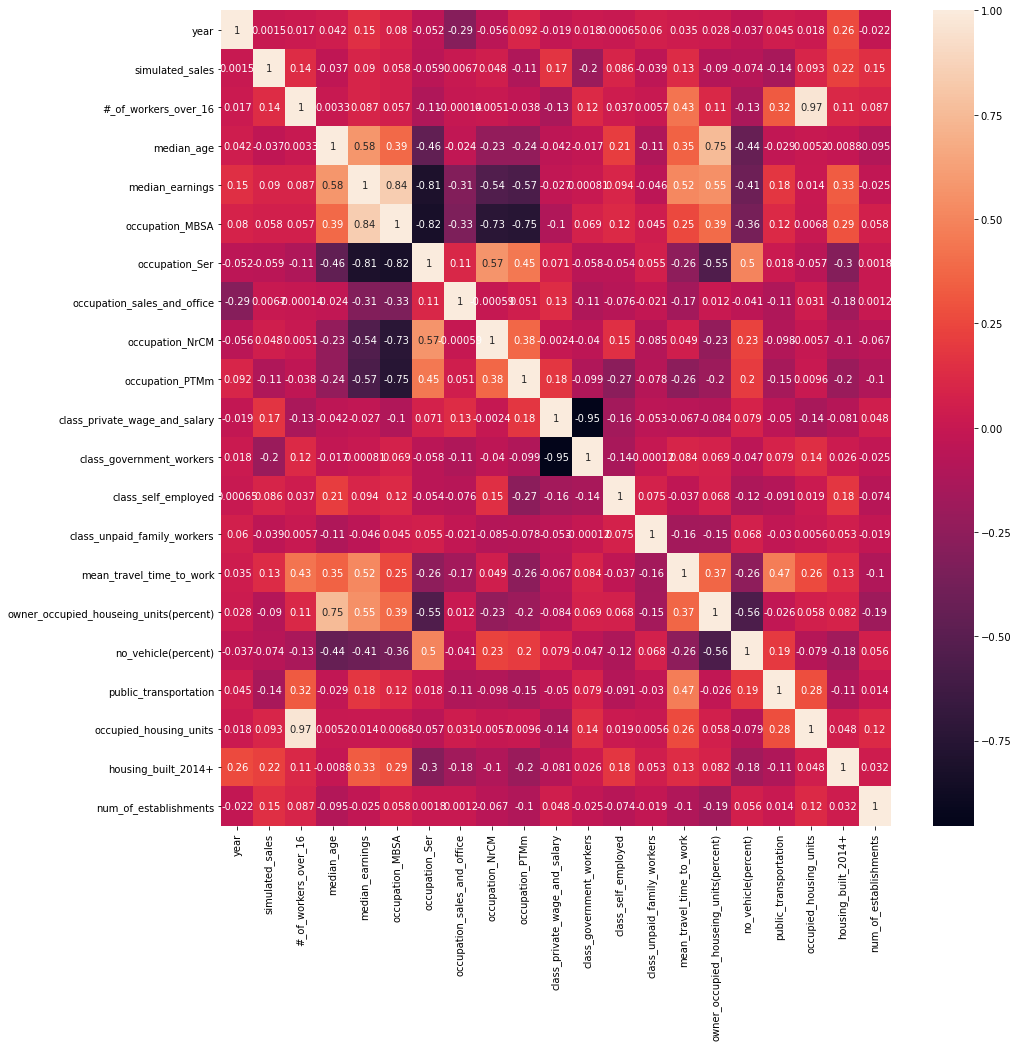

In [253]:
plt.figure(figsize=(15,15))
sns.heatmap(final_dataset.corr(),annot=True)

In [269]:
def multicollinearity(df):
    vif_data = pd.DataFrame()
    vif_data['IndependVariables'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                       for i in range(len(df.columns))]
    vif_data = vif_data.sort_values('VIF', ascending = False)
    #print(vif_data)
    while vif_data['VIF'].iloc[0] > 10:
        maxName = vif_data.iloc[0]
        #print(maxName)
        #vif_data = vif_data.iloc[1:,:]
        df = df.drop([maxName.IndependVariables],axis = 1)
        vif_data = pd.DataFrame()
        vif_data['IndependVariables'] = df.columns
        vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                           for i in range(len(df.columns))]
        vif_data = vif_data.sort_values('VIF', ascending = False)
        print(vif_data)
    return df

In [270]:
test = final_dataset.iloc[:,6:]
test.dropna(inplace = True)

In [271]:
X = multicollinearity(test)

                         IndependVariables         VIF
2                               median_age  521.223548
16                  occupied_housing_units  164.396379
1                     #_of_workers_over_16  160.197025
3                          median_earnings  145.367017
4                          occupation_MBSA  113.458973
13  owner_occupied_houseing_units(percent)   89.698885
12                mean_travel_time_to_work   73.189347
6              occupation_sales_and_office   71.629948
5                           occupation_Ser   58.602325
7                          occupation_NrCM   21.203540
10                     class_self_employed   19.483533
8                          occupation_PTMm   16.234351
0                          simulated_sales   12.870494
9                 class_government_workers   10.191912
14                     no_vehicle(percent)    8.964844
18                   num_of_establishments    4.702820
17                     housing_built_2014+    3.049265
15        

In [273]:
X.head()

,simulated_sales,#_of_workers_over_16,occupation_NrCM,occupation_PTMm,class_government_workers,class_self_employed,class_unpaid_family_workers,no_vehicle(percent),public_transportation,housing_built_2014+,num_of_establishments
0,1.158712e+07,10763.0,16.3,13.8,9.5,9.0,0.3,2.4,105.0,0.0,11.0
1,9.483031e+06,23881.0,11.1,11.4,8.9,6.9,0.3,3.0,90.0,1.8,7.0
2,7.325231e+06,14994.0,6.4,13.0,15.2,2.8,0.2,2.1,74.0,0.1,3.0
3,6.567164e+06,28994.0,5.0,7.4,12.9,4.2,0.2,3.6,1632.0,0.4,4.0
4,6.803906e+06,20021.0,7.2,18.4,18.1,3.4,0.1,0.6,47.0,0.6,4.0


In [292]:
from sklearn.linear_model import LassoCV,LinearRegression,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [279]:
y = X['simulated_sales']
X.drop(columns='simulated_sales',inplace=True)

In [290]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=2021)

In [293]:
scaler = StandardScaler().fit(X_train)
scaler2 = StandardScaler().fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [294]:
reg_model = LinearRegression(fit_intercept=True, normalize=True).fit(X_train_scaled,y_train)

In [296]:
reg_model.score(X_train_scaled,y_train)

0.33459143366465094

In [297]:
import statsmodels.api as sm
from scipy import stats

In [298]:
X2 = sm.add_constant(X_train_scaled)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        simulated_sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     5.079
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.62e-06
Time:                        16:42:21   Log-Likelihood:                -1824.8
No. Observations:                 112   AIC:                             3672.
Df Residuals:                     101   BIC:                             3701.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.245e+06   2.87e+05     32.254      0.0

<AxesSubplot:xlabel='simulated_sales', ylabel='simulated_sales'>

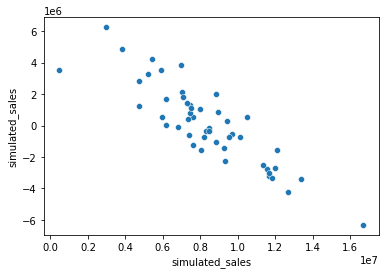

In [299]:
y_pred = reg_model.predict(X_test_scaled)
sns.scatterplot(y = y_pred-y_test, x = y_test )